In [1]:
!pip install spacy  watermark -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.0 MB/s eta 0:00:00


In [2]:
!python -m spacy download es_core_news_lg -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 3.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
import spacy
from spacy import displacy

## Script: Pipeline de Spacy en Español
Paso 1: Cargando el modelo 'es_core_news_sm'

In [4]:
nlp = spacy.load("es_core_news_lg")
import es_core_news_lg
nlp = es_core_news_lg.load()

Texto de ejemplo

In [5]:
texto_ejemplo = "La empresa española TechSolutions S.L. abrirá una nueva sede en Argentina el próximo año."

Procesando el texto con el pipeline de Spacy

In [6]:
doc = nlp(texto_ejemplo)

Tokenizacion

In [7]:
tokens = [token.text for token in doc]
print(tokens)

['La', 'empresa', 'española', 'TechSolutions', 'S.L.', 'abrirá', 'una', 'nueva', 'sede', 'en', 'Argentina', 'el', 'próximo', 'año', '.']


Lematización:
Forma base (lema) de cada token

In [8]:
for token in doc:
    # Ignoramos puntuación y espacios para mayor claridad
    if not token.is_punct and not token.is_space:
        print(f"'{token.text}' -> '{token.lemma_}'")

'La' -> 'el'
'empresa' -> 'empresa'
'española' -> 'español'
'TechSolutions' -> 'TechSolutions'
'S.L.' -> 'S.L.'
'abrirá' -> 'abrir'
'una' -> 'uno'
'nueva' -> 'nuevo'
'sede' -> 'sede'
'en' -> 'en'
'Argentina' -> 'Argentina'
'el' -> 'el'
'próximo' -> 'próximo'
'año' -> 'año'


Etiquetado Gramatical (POS Tagging):

In [9]:
for token in doc:
    if not token.is_space: # Ignoramos espacios
        print(f"'{token.text}' -> {token.pos_} ({spacy.explain(token.pos_)}) -> {token.tag_}")

'La' -> DET (determiner) -> DET
'empresa' -> NOUN (noun) -> NOUN
'española' -> ADJ (adjective) -> ADJ
'TechSolutions' -> PROPN (proper noun) -> PROPN
'S.L.' -> PROPN (proper noun) -> PROPN
'abrirá' -> VERB (verb) -> VERB
'una' -> DET (determiner) -> DET
'nueva' -> ADJ (adjective) -> ADJ
'sede' -> NOUN (noun) -> NOUN
'en' -> ADP (adposition) -> ADP
'Argentina' -> PROPN (proper noun) -> PROPN
'el' -> DET (determiner) -> DET
'próximo' -> ADJ (adjective) -> ADJ
'año' -> NOUN (noun) -> NOUN
'.' -> PUNCT (punctuation) -> PUNCT


Análisis de Dependencias Sintácticas:
Token -> Relación de Dependencia (dep_) -> Cabeza (head)"

In [10]:
for token in doc:
     if not token.is_space:
        print(f"'{token.text}' -> {token.dep_} ({spacy.explain(token.dep_)}) -> '{token.head.text}'")

'La' -> det (determiner) -> 'empresa'
'empresa' -> nsubj (nominal subject) -> 'abrirá'
'española' -> amod (adjectival modifier) -> 'empresa'
'TechSolutions' -> appos (appositional modifier) -> 'empresa'
'S.L.' -> appos (appositional modifier) -> 'empresa'
'abrirá' -> ROOT (root) -> 'abrirá'
'una' -> det (determiner) -> 'sede'
'nueva' -> amod (adjectival modifier) -> 'sede'
'sede' -> obj (object) -> 'abrirá'
'en' -> case (case marking) -> 'Argentina'
'Argentina' -> obl (oblique nominal) -> 'abrirá'
'el' -> det (determiner) -> 'año'
'próximo' -> amod (adjectival modifier) -> 'año'
'año' -> obl (oblique nominal) -> 'abrirá'
'.' -> punct (punctuation) -> 'abrirá'


In [11]:
displacy.render(doc, style='dep', jupyter=True, options={'distance': 120})

Reconocimiento de Entidades Nombradas (NER):

In [12]:
if doc.ents:
    print("Entidades encontradas:")
    print("Texto de la Entidad -> Etiqueta (Tipo)")
    for ent in doc.ents:
        print(f"'{ent.text}' -> {ent.label_} ({spacy.explain(ent.label_)})")
else:
    print("No se encontraron entidades nombradas en este texto.")

Entidades encontradas:
Texto de la Entidad -> Etiqueta (Tipo)
'TechSolutions' -> MISC (Miscellaneous entities, e.g. events, nationalities, products or works of art)
'Argentina' -> LOC (Non-GPE locations, mountain ranges, bodies of water)


In [13]:
displacy.render(doc,style='ent',jupyter=True,options={'distance':200})

In [14]:
print(nlp.pipe_names)

['tok2vec', 'morphologizer', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


## EJEMPLO DIDACTICO

In [15]:
from collections import Counter

In [16]:
wiki_txt = """
La fotosíntesis es el proceso químico fundamental mediante el cual las plantas verdes,
algas y algunas bacterias convierten la energía lumínica del sol en energía química.
Utilizan dióxido de carbono del aire y agua del suelo para producir glucosa,
su alimento principal, liberando oxígeno como subproducto. La clorofila,
un pigmento verde en los cloroplastos, es crucial para capturar esta energía solar.
Este proceso sustenta casi toda la vida en la Tierra.
"""

In [17]:
print(f"'{wiki_txt[:150]}...'") # Muestra un fragmento

'
La fotosíntesis es el proceso químico fundamental mediante el cual las plantas verdes,
algas y algunas bacterias convierten la energía lumínica del s...'


In [18]:
doc = nlp(wiki_txt)
print("¡Texto procesado!")

¡Texto procesado!


Extracción y filtrando de palabras clave (lemas)

In [19]:
palabras_clave = []
for token in doc:
    if token.is_alpha and not token.is_stop:
      # Normalización: Obtener lema y convertir a minúsculas
      palabras_clave.append(token.lemma_.lower())

print(f"Se extrajeron {len(palabras_clave)} palabras clave (lemas, sin stop words).")
# Ejemplo de las primeras palabras extraídas:
print(f"Ejemplo: {palabras_clave[:15]}")

Se extrajeron 39 palabras clave (lemas, sin stop words).
Ejemplo: ['fotosíntesis', 'proceso', 'químico', 'fundamental', 'planta', 'verde', 'alga', 'bacteria', 'convertir', 'energía', 'lumínico', 'sol', 'energía', 'químico', 'utilizar']


In [20]:
frecuencia_palabras = Counter(palabras_clave)

In [21]:
N = 15
palabras_mas_comunes = frecuencia_palabras.most_common(N)

In [22]:
for palabra, frecuencia in palabras_mas_comunes:
    print(f"- '{palabra}' : {frecuencia}")

- 'energía' : 3
- 'proceso' : 2
- 'químico' : 2
- 'verde' : 2
- 'fotosíntesis' : 1
- 'fundamental' : 1
- 'planta' : 1
- 'alga' : 1
- 'bacteria' : 1
- 'convertir' : 1
- 'lumínico' : 1
- 'sol' : 1
- 'utilizar' : 1
- 'dióxido' : 1
- 'carbono' : 1


In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [24]:
wordcloud_generator = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis', # Paleta de colores
    max_words=50,      # Mostrar máximo 50 palabras
    stopwords=None,    # Ya filtramos stop words antes
    collocations=False # Evitar que agrupe palabras (ej. "dióxido carbono")
                       # Si se quisiera, sería mejor hacerlo antes con Spacy/N-gramas
).generate_from_frequencies(frecuencia_palabras) # <-- Usar las frecuencias calculadas

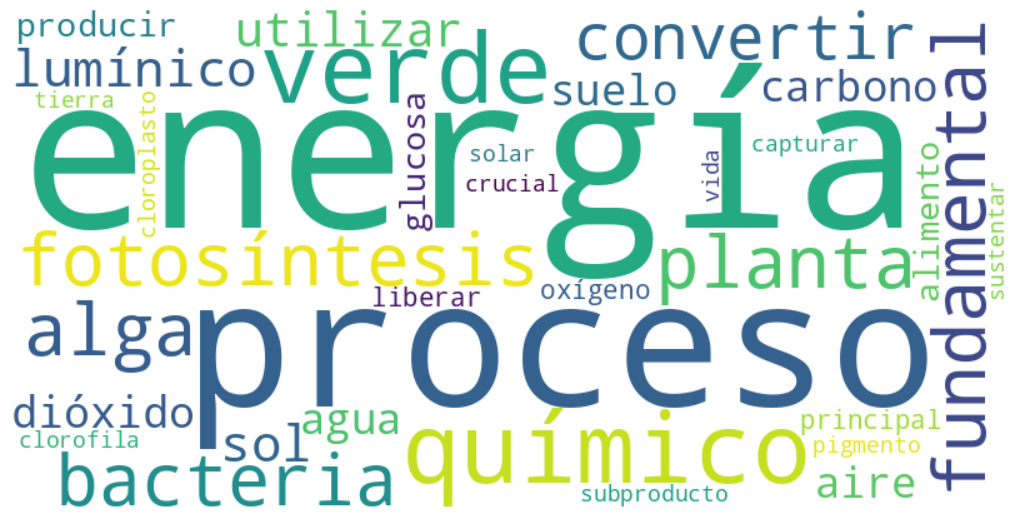

In [25]:
plt.figure(figsize=(10, 5)) # Tamaño de la figura donde se mostrará
plt.imshow(wordcloud_generator, interpolation='bilinear') # Mostrar la imagen generada
plt.axis("off") # No mostrar los ejes X e Y
plt.tight_layout(pad=0) # Ajustar para que no haya bordes extra
plt.show() # <-- ¡Mostrar la ventana con la nube!